In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import preprocessing 
import warnings
warnings.filterwarnings("ignore")

In [2]:
penguins = pd.read_csv('penguins_size.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins.shape

(344, 7)

In [8]:
penguins.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
penguins.dropna(inplace=True)

In [10]:
penguins.duplicated().sum()

np.int64(0)

In [11]:
penguins.describe(include="object")

,species,island,sex
count,334,334,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,146,164,168


In [13]:
penguins['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [15]:
penguins.drop(penguins[penguins['sex'] == '.'].index, inplace = True)

In [16]:
penguins['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [18]:
# Creating a 'species' variable holding index and values of species column
species = penguins["species"].value_counts()

In [19]:
# Set a size of figure
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

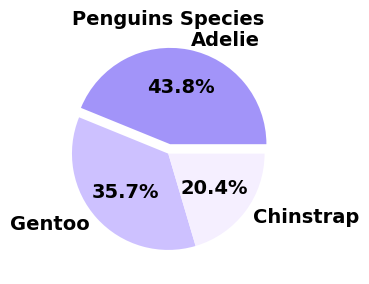

In [39]:
plt.subplot(1,2,1)
plt.title("Penguins Species",fontweight="black",size=14)
plt.pie(species.values, labels=species.index, autopct="%.1f%%", textprops={"fontweight":"black","size":14}
     ,explode=(0.1, 0, 0), colors=['#A294F9', '#CDC1FF', '#F5EFFF'])
plt.tight_layout()
plt.show()

C:\Users\sthefany.bspina\AppData\Local\Temp\ipykernel_44596\1014709776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(y=species.values,x=species.index,palette=['#A294F9', '#CDC1FF', '#F5EFFF'])


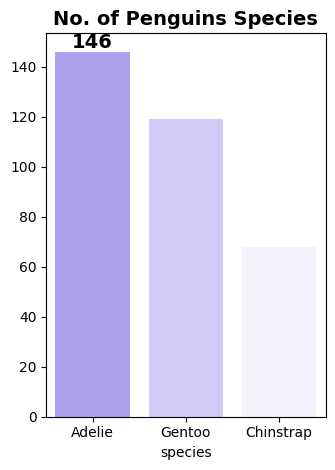

In [40]:
plt.subplot(1,2,2)
ax=sns.barplot(y=species.values,x=species.index,palette=['#A294F9', '#CDC1FF', '#F5EFFF'])
ax.bar_label(ax.containers[0],fontweight="black",size=14)

# Set a title of second plot
plt.title("No. of Penguins Species",fontweight="black",size=14)

plt.tight_layout()
plt.show()

In [43]:
# Plot a histogram
def histplot(column):
    plt.figure(figsize=(10,4))
    sns.histplot(x=column, data=penguins, kde=True, hue='species')
    skew = penguins[column].skew()
    plt.title(f"{column.title()} Skewness is: {round(skew,2)}",fontweight="black",size=15)
    plt.tight_layout()
    plt.show()

SyntaxError: positional argument follows keyword argument (689086392.py, line 4)

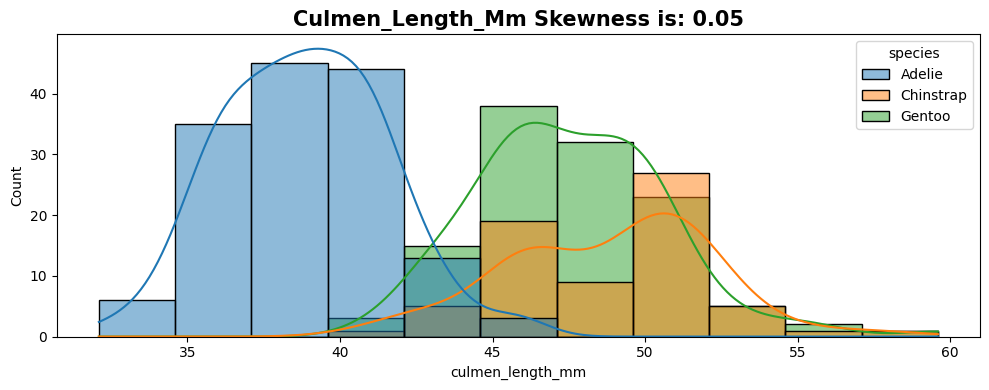

In [25]:
    histplot('culmen_length_mm')

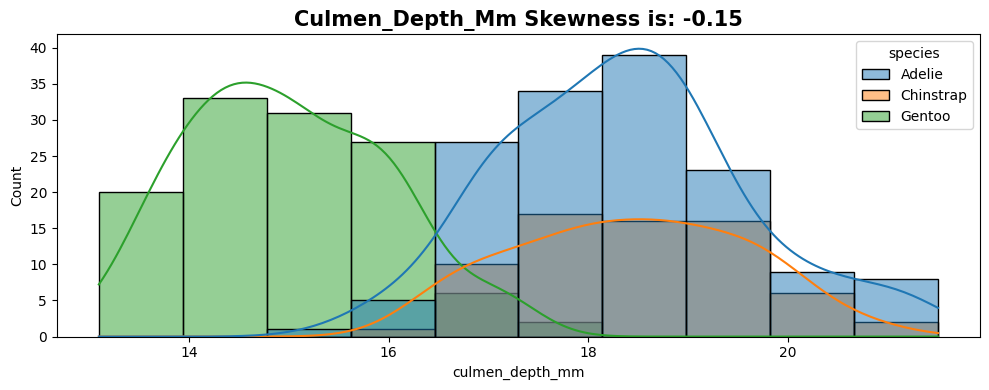

In [26]:
histplot('culmen_depth_mm')

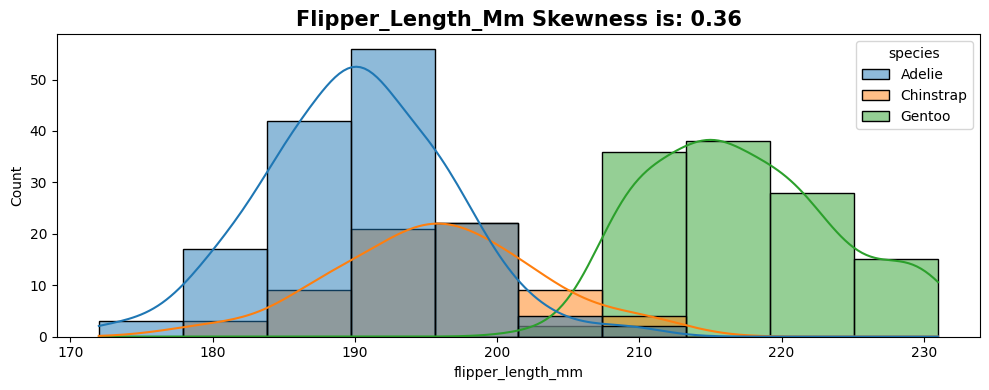

In [27]:
histplot('flipper_length_mm')

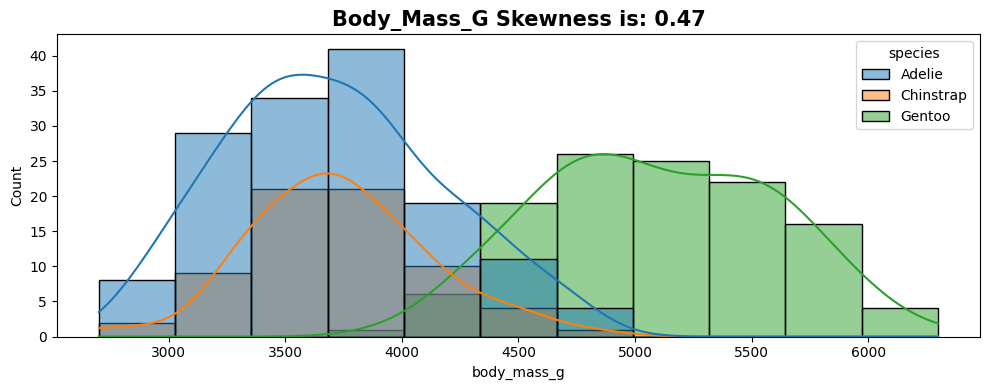

In [28]:
histplot('body_mass_g')

In [45]:
#Penguins Distribution
def countplot(column):
    plt.figure(figsize=(12,5))
    sns.countplot(x=column, data=penguins, order=penguins[column].value_counts().index, palette=['#A294F9', '#CDC1FF', '#F5EFFF'])
    plt.title(f"Distribution of {column}",fontweight="black",fontsize=15)

C:\Users\sthefany.bspina\AppData\Local\Temp\ipykernel_44596\2426923710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=penguins, order=penguins[column].value_counts().index, palette=['#A294F9', '#CDC1FF', '#F5EFFF'])


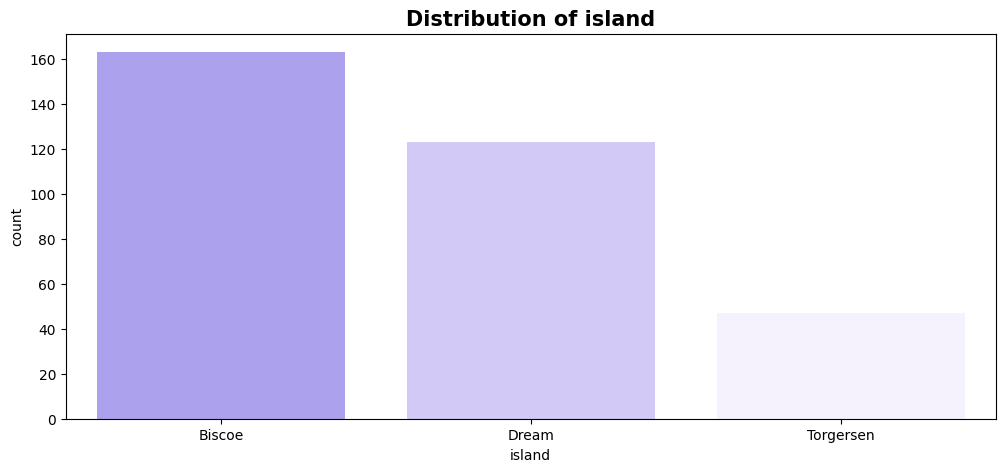

In [46]:
#Island Distribution
countplot('island')

C:\Users\sthefany.bspina\AppData\Local\Temp\ipykernel_44596\2426923710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=penguins, order=penguins[column].value_counts().index, palette=['#A294F9', '#CDC1FF', '#F5EFFF'])
C:\Users\sthefany.bspina\AppData\Local\Temp\ipykernel_44596\2426923710.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x=column, data=penguins, order=penguins[column].value_counts().index, palette=['#A294F9', '#CDC1FF', '#F5EFFF'])


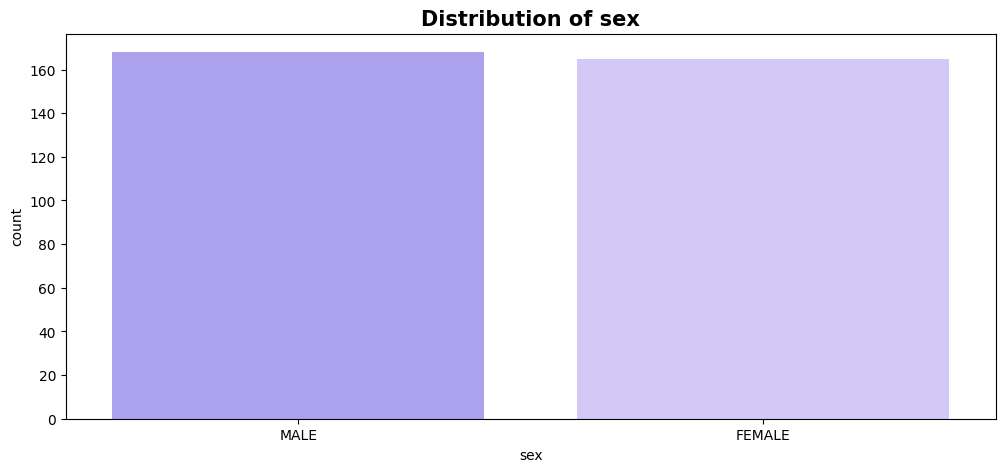

In [47]:
#Sex Distribution
countplot('sex')

In [50]:
#Bivariate Analysis
def boxplot(column):
    plt.figure(figsize=(12,5))
    sns.boxplot(x='species' , y=column, data=penguins)
    plt.title(f"{column.title()} vs species",fontweight="black",size=25,pad=10,)

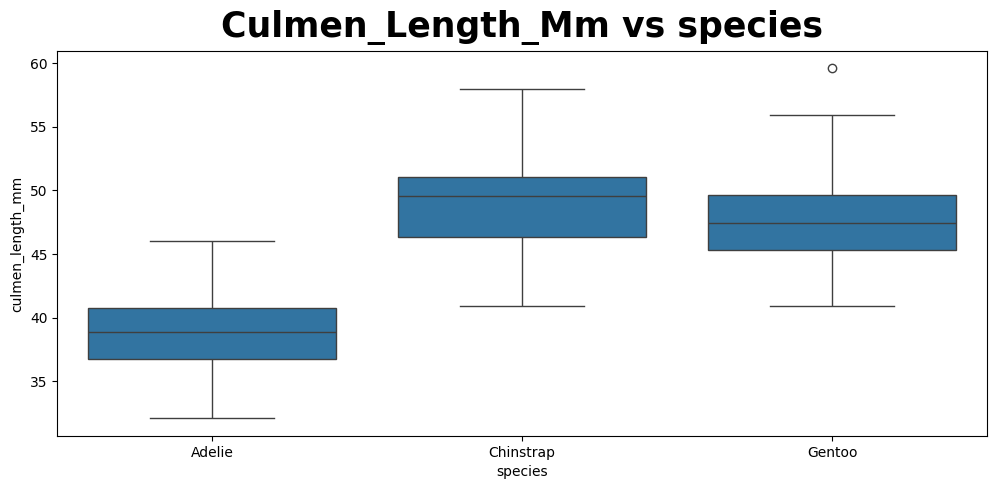

In [51]:
boxplot('culmen_length_mm')

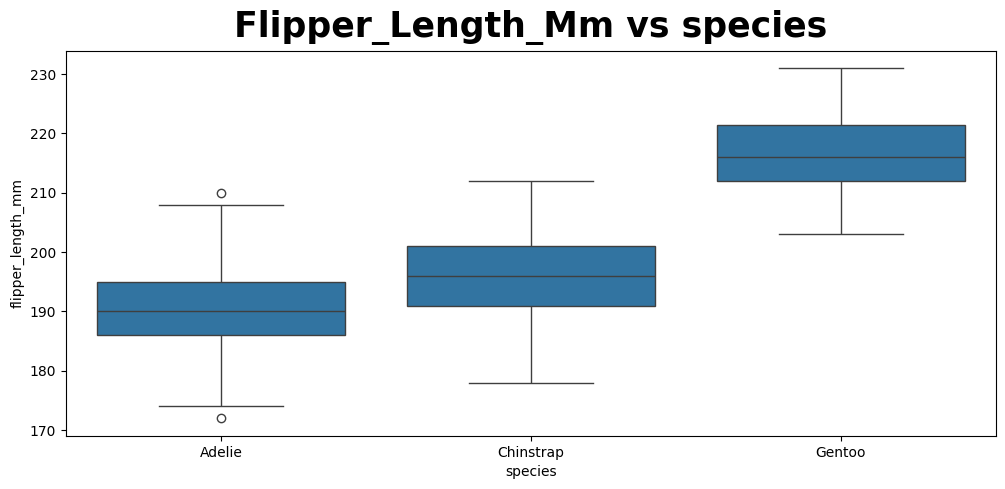

In [52]:
boxplot('flipper_length_mm')

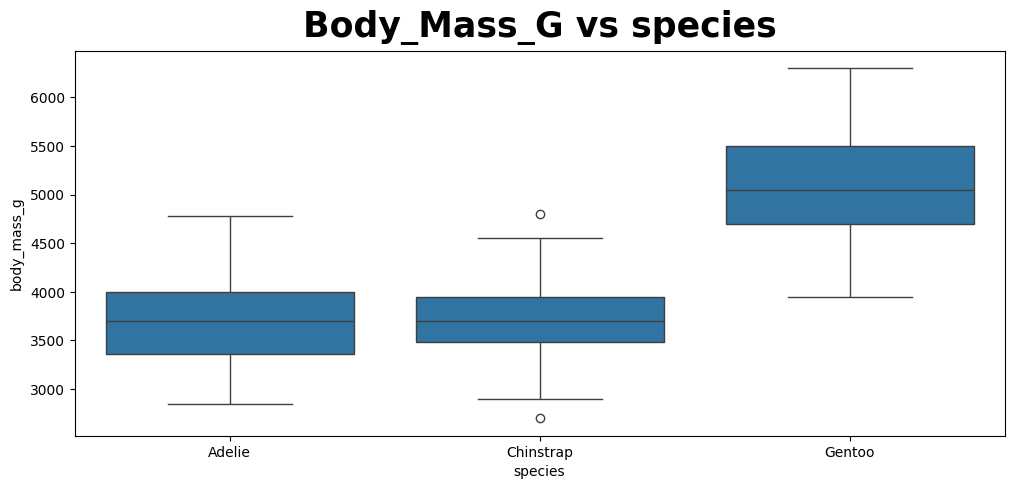

In [53]:
boxplot('body_mass_g')

In [56]:
#Correlation Analysis
label_encoder = preprocessing.LabelEncoder()

# Applying the fit and transform function
penguins['species'] = label_encoder.fit_transform(penguins['species'])

In [57]:
# Replace datatype into integer
penguins["sex"] = penguins["sex"].replace({"FEMALE":0,"MALE":1})

In [58]:
# Convert datatype into integer
penguins["island"] = label_encoder.fit_transform(penguins[["island"]])

<Axes: >

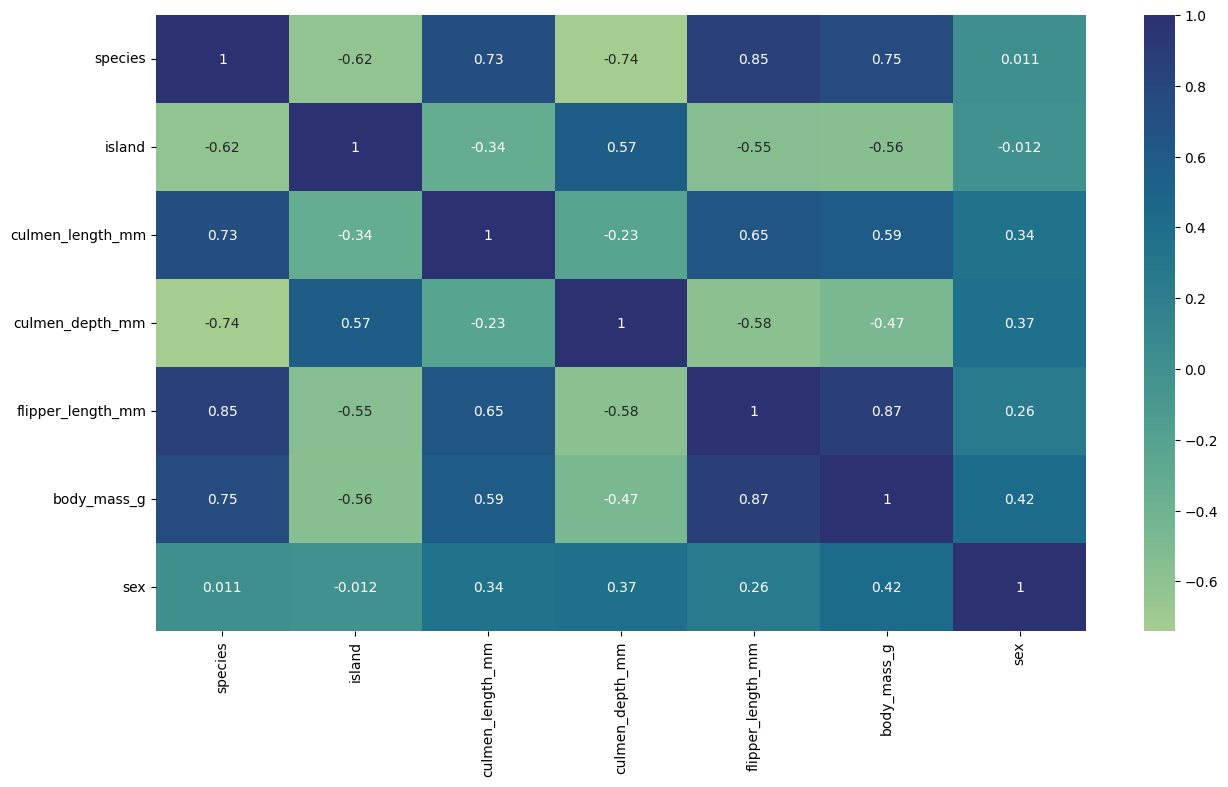

In [59]:
# Using correlation function
corr = penguins.corr()

# Plot correlation
plt.figure(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, cmap= 'crest')